# Pyod 

In [63]:
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print
from pyod.utils.data import generate_data
from pyod.models.knn import KNN

In [64]:
contamination = 0.1 # percentage of outliers
n_train = 200 # training point
n_test = 100 # test point

In [65]:
# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

In [66]:
X_train

array([[ 6.43365854,  5.5091683 ],
       [ 5.04469788,  7.70806466],
       [ 5.92453568,  5.25921966],
       [ 5.29399075,  5.67126197],
       [ 5.61509076,  6.1309285 ],
       [ 6.18590347,  6.09410578],
       [ 7.16630941,  7.22719133],
       [ 4.05470826,  6.48127032],
       [ 5.79978164,  5.86930893],
       [ 4.82256361,  7.18593123],
       [ 5.98049594,  6.28356746],
       [ 6.33258429,  6.66392412],
       [ 5.76600157,  5.97620246],
       [ 6.0758669 ,  6.53009041],
       [ 5.88816972,  5.97352684],
       [ 5.40257927,  5.37920689],
       [ 6.75674297,  7.2607963 ],
       [ 5.70636785,  6.29952894],
       [ 5.04840502,  5.67376352],
       [ 5.64370447,  7.21564822],
       [ 6.25760622,  4.88869009],
       [ 4.2626848 ,  5.16744774],
       [ 6.13773065,  6.25856245],
       [ 6.59485505,  4.53524592],
       [ 6.45018449,  6.02033788],
       [ 6.37739196,  6.52573284],
       [ 7.86684582,  6.85415672],
       [ 6.07689629,  6.33425195],
       [ 5.23991937,

In [68]:
X_test

array([[ 5.30170184,  5.81269836],
       [ 5.21264227,  5.60827597],
       [ 5.03567292,  7.26741076],
       [ 5.39633486,  5.30208702],
       [ 4.94276882,  5.38493049],
       [ 5.60530122,  5.96053793],
       [ 5.4853278 ,  4.72344392],
       [ 4.79206146,  6.5420578 ],
       [ 5.90207069,  6.51752025],
       [ 6.62230299,  6.12049276],
       [ 5.01764176,  6.15120212],
       [ 7.11623849,  5.64315692],
       [ 6.2716553 ,  5.98901149],
       [ 7.09453029,  5.45943645],
       [ 6.91999125,  5.7009129 ],
       [ 5.44638876,  6.08761813],
       [ 6.27312411,  7.52452703],
       [ 6.25484496,  6.15414756],
       [ 7.27299261,  6.47936636],
       [ 5.48616285,  7.08144467],
       [ 5.41012224,  5.48219739],
       [ 5.32326827,  5.25330434],
       [ 6.26572002,  5.79431194],
       [ 3.22601054,  5.78604868],
       [ 5.58694271,  6.71206661],
       [ 5.55077704,  8.02516724],
       [ 7.11400292,  5.6890297 ],
       [ 6.91687382,  6.41887892],
       [ 6.18619901,

In [76]:
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Modeling

In [69]:
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [70]:
# 예측된 결과
clf.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Evaluation

In [72]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

In [73]:
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

In [78]:
print("On Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


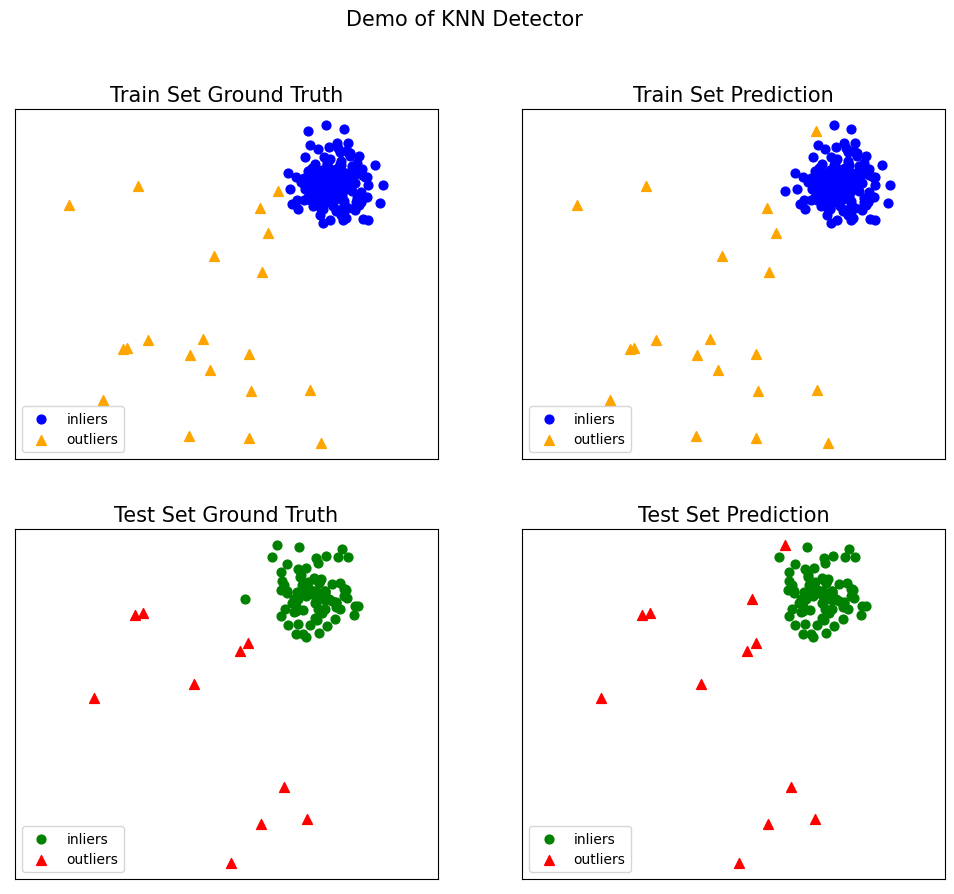

In [79]:
# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)